<a href="https://colab.research.google.com/github/arekangel/AI_AUTH_2025_Areklakis_Aggelos/blob/main/4hergasiaml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
PART1

In [ ]:
import pandas as pd

df = pd.read_csv("wine-missing.csv")


In [ ]:
1.

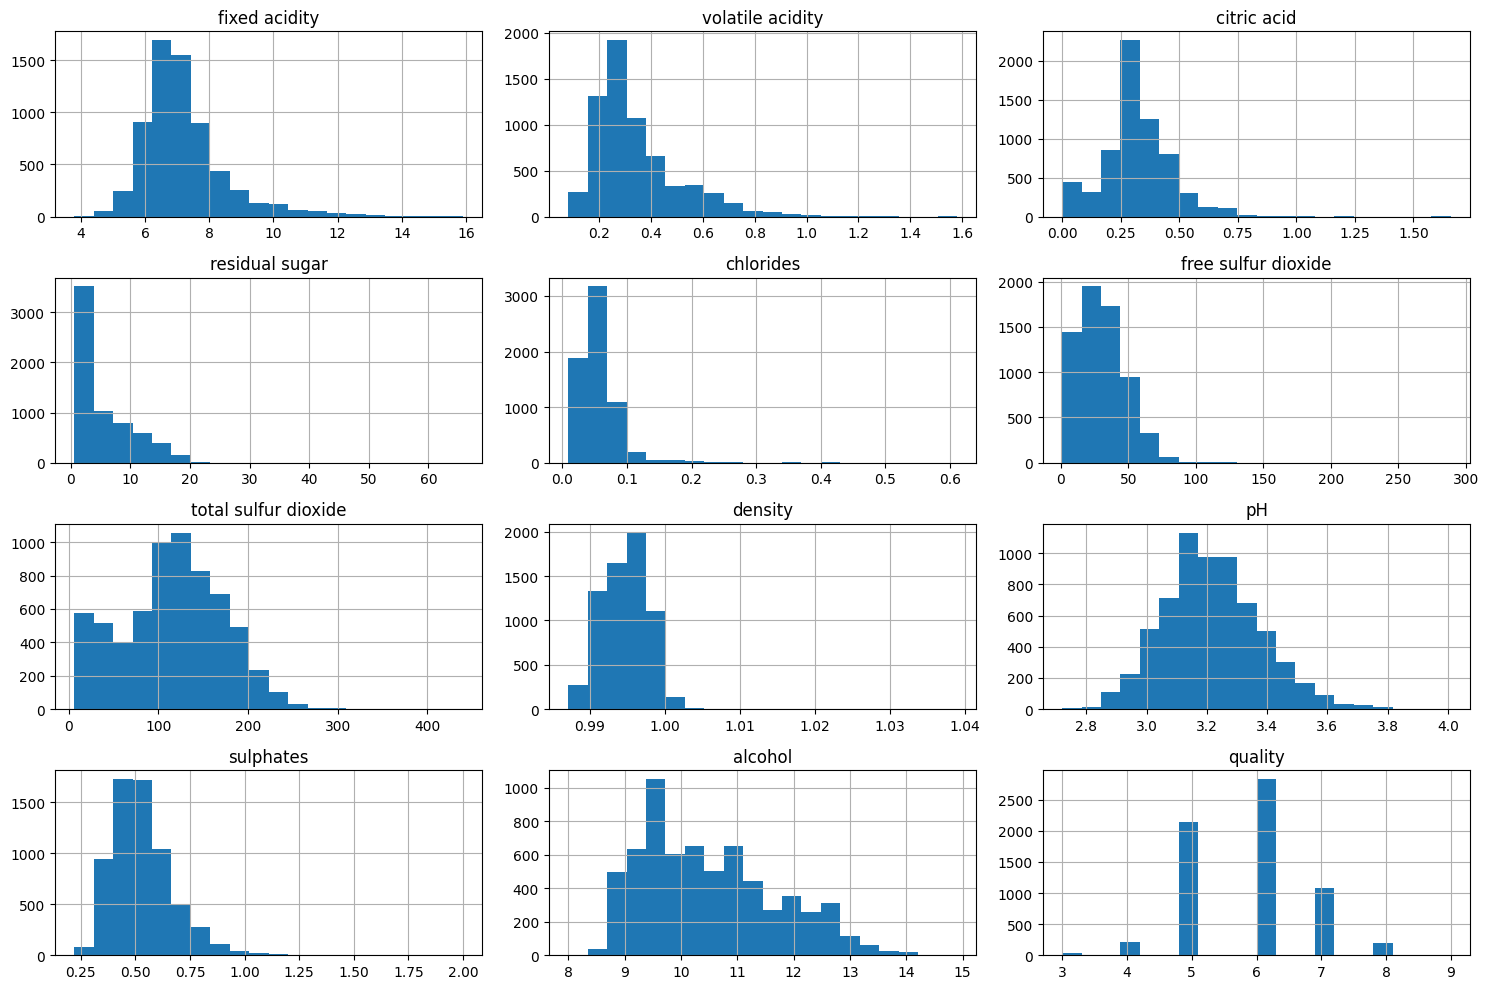

In [ ]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

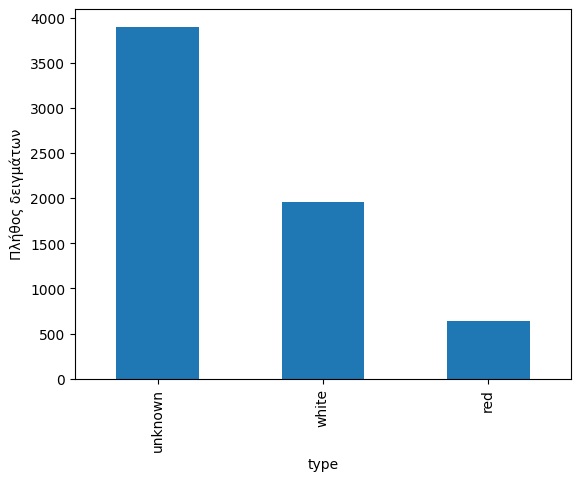

In [ ]:
df["type"].value_counts().plot(kind="bar")
plt.xlabel("type")
plt.ylabel("Πλήθος δειγμάτων")
plt.show()

2.

In [ ]:
df_changed = df.copy() #i create a copy of the original array
df_changed.loc[df_changed["type"] == "white", "type"] = 0
df_changed.loc[df_changed["type"] == "red", "type"] = 1
df_changed.loc[df_changed["type"] == "unknown", "type"] = 2#i changed the type from word to numbers
df_changed["type"] = df_changed["type"].astype(int)#very importand because the column was string and in future steps i m gonna have problem in training the algorithm


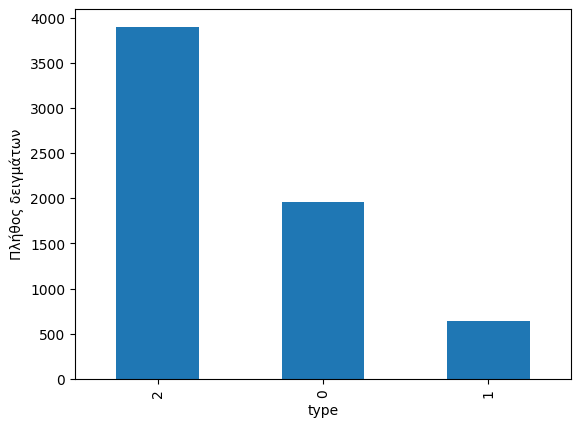

In [ ]:
df_changed["type"].value_counts().plot(kind="bar")
plt.xlabel("type")
plt.ylabel("Πλήθος δειγμάτων")
plt.show()

3.

In [ ]:
df_known = df_changed[df_changed["type"] != 2]

x_known = df_known.drop(columns=["type"]).values
y_known = df_known["type"].values

df_unknown = df_changed[df_changed["type"] == 2]
x_unknown=df_unknown.drop(columns=["type"]).values

4.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_known,
    y_known,
    test_size=0.3,
    random_state=42,
    stratify=y_known
)

5.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average="weighted")
train_recall = recall_score(y_train, y_train_pred, average="weighted")
train_f1 = f1_score(y_train, y_train_pred, average="weighted")



In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average="weighted")
test_recall = recall_score(y_test, y_test_pred, average="weighted")
test_f1 = f1_score(y_test, y_test_pred, average="weighted")

In [ ]:
print("TRAIN SET")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTEST SET")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)

TRAIN SET
Accuracy : 0.999450247388675
Precision: 0.9994514717820188
Recall   : 0.999450247388675
F1-score : 0.9994504535450379

TEST SET
Accuracy : 0.9987179487179487
Precision: 0.9987245914707055
Recall   : 0.9987179487179487
F1-score : 0.9987190681658766


In [ ]:
βλέπω γενικά πολύ μικρες και μεταξυ των μετρητών αλλά και στα 2 set άρα η f1 είναι η μετρική που πρέπει να κρατήσω

6

η κλαση class_weight="balanced" προσαρμόζει το βάρος αντίστροφος αναλογα με τη συχνότητα της στο dataset.θεωρητικα ο στόχος μας θα ειναι να μην αγβοεί την κλαση που εμφανίζεται λιγότερο.

In [ ]:
rf_balanced = RandomForestClassifier(
    random_state=42,
    class_weight="balanced"
)
rf_balanced.fit(x_train, y_train)
y_train_pred_bal = rf_balanced.predict(x_train)
y_test_pred_bal = rf_balanced.predict(x_test)

In [ ]:
train_acc_bal = accuracy_score(y_train, y_train_pred_bal)
train_prec_bal = precision_score(y_train, y_train_pred_bal, average="weighted")
train_rec_bal = recall_score(y_train, y_train_pred_bal, average="weighted")
train_f1_bal = f1_score(y_train, y_train_pred_bal, average="weighted")
test_acc_bal = accuracy_score(y_test, y_test_pred_bal)
test_prec_bal = precision_score(y_test, y_test_pred_bal, average="weighted")
test_rec_bal = recall_score(y_test, y_test_pred_bal, average="weighted")
test_f1_bal = f1_score(y_test, y_test_pred_bal, average="weighted")

In [ ]:
print("TRAIN (balanced)")
print(train_acc_bal, train_prec_bal, train_rec_bal, train_f1_bal)

print("\nTEST (balanced)")
print(test_acc_bal, test_prec_bal, test_rec_bal, test_f1_bal)

TRAIN (balanced)
0.999450247388675 0.9994514717820188 0.999450247388675 0.9994504535450379

TEST (balanced)
0.9948717948717949 0.9948713374047896 0.9948717948717949 0.9948627235660897


7

In [ ]:
y_unknown_proba=rf_balanced.predict_proba(x_unknown)

In [ ]:
y_unknown_proba

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99]])

8.

In [ ]:
import numpy as np

y_unknown_pred = np.array(["unassigned"] * len(y_unknown_proba))
y_unknown_pred[y_unknown_proba[:, 1] > 0.65] = "red"
y_unknown_pred[y_unknown_proba[:, 0] > 0.65] = "white"
np.unique(y_unknown_pred, return_counts=True)

(array(['red', 'unassigned', 'white'], dtype='<U10'),
 array([ 908,   51, 2939]))

part2

1

In [ ]:
df_full = pd.read_csv("wine-full.csv")
df_full["quality"].value_counts().sort_index()

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


<Axes: xlabel='quality'>

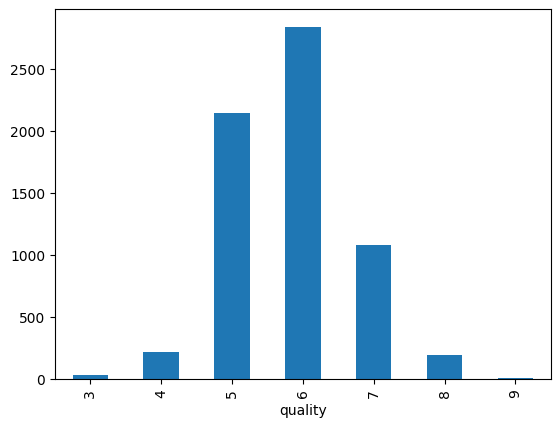

In [ ]:
import matplotlib.pyplot as plt

df_full["quality"].value_counts().sort_index().plot(kind="bar")

οχι δεν ειναι ισσοροπημένο καθώς τα περισσότερα δείγματα έχουν τιμες 5-6-7

2

In [ ]:
df_red = df_full[df_full["type"] == "red"]
df_white = df_full[df_full["type"] == "white"]
df_red["quality"].describe(), df_white["quality"].describe()


(count    1599.000000
 mean        5.636023
 std         0.807569
 min         3.000000
 25%         5.000000
 50%         6.000000
 75%         6.000000
 max         8.000000
 Name: quality, dtype: float64,
 count    4898.000000
 mean        5.877909
 std         0.885639
 min         3.000000
 25%         5.000000
 50%         6.000000
 75%         6.000000
 max         9.000000
 Name: quality, dtype: float64)

με βαση το data set βλεπω οτι τα λευκα ενω ειναι 3 πλασια σχεδον εχουν καλύτερο μέσο όρο ποιότητας αρα θεωρω οτι ειναι ελαφρως πιο ποιοτικά


4

In [ ]:
df__full_changed = df_full.copy() #i create a copy of the original array
df__full_changed.loc[df__full_changed["type"] == "white", "type"] = 0
df__full_changed.loc[df__full_changed["type"] == "red", "type"] = 1
df__full_changed.loc[df__full_changed["type"] == "unknown", "type"] = 2#i changed the type from word to numbers
df__full_changed["type"] = df__full_changed["type"].astype(int)#very importand because the column was string and in future steps i m gonna have problem in training the algorithm


In [ ]:
import numpy as np

X = df__full_changed.drop(columns=["quality"]).values
y = df__full_changed["quality"].values

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=0
)

5

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train, y_train)
y_test_pred = dt.predict(x_test)
mae = mean_absolute_error(y_test, y_test_pred)
print("MAE on test set:", mae)

MAE on test set: 0.44769230769230767


6

In [ ]:
mae_scores = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.1,
        random_state=seed
    )


    dt = DecisionTreeRegressor(random_state=0)
    dt.fit(x_train, y_train)


    y_test_pred = dt.predict(x_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mae_scores.append(mae)


In [ ]:
mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)

print("MAE scores:", mae_scores)
print("Mean MAE:", mae_mean)
print("Std MAE :", mae_std)

MAE scores: [0.44769230769230767, 0.5, 0.4338461538461538, 0.4707692307692308, 0.5046153846153846, 0.4338461538461538, 0.48923076923076925, 0.46615384615384614, 0.4307692307692308, 0.4846153846153846]
Mean MAE: 0.4661538461538462
Std MAE : 0.026832815729997475


7

In [ ]:
x_trainval, x_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.10, random_state=0
)
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval, y_trainval, test_size=(0.20/0.90), random_state=0
)

print(x_train.shape, x_val.shape, x_test.shape)


(4547, 12) (1300, 12) (650, 12)


In [ ]:
param_grid = [
    {"max_depth": None, "min_samples_split": 2,  "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 5,    "min_samples_split": 2,  "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 8,    "min_samples_split": 2,  "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 12,   "min_samples_split": 2,  "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 5,    "min_samples_split": 5,  "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 8,    "min_samples_split": 5,  "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 12,   "min_samples_split": 5,  "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 5,    "min_samples_split": 10, "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 8,    "min_samples_split": 10, "min_samples_leaf": 1, "max_features": None},
    {"max_depth": 12,   "min_samples_split": 10, "min_samples_leaf": 1, "max_features": None},

    {"max_depth": 8,    "min_samples_split": 2,  "min_samples_leaf": 2, "max_features": None},
    {"max_depth": 8,    "min_samples_split": 5,  "min_samples_leaf": 2, "max_features": None},
    {"max_depth": 8,    "min_samples_split": 10, "min_samples_leaf": 2, "max_features": None},

    {"max_depth": 8,    "min_samples_split": 5,  "min_samples_leaf": 2, "max_features": "sqrt"},
    {"max_depth": 12,   "min_samples_split": 5,  "min_samples_leaf": 2, "max_features": "sqrt"},
]

rows = []
for i, params in enumerate(param_grid, start=1):
    model = DecisionTreeRegressor(random_state=0, **params)
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    rows.append({
        "run": i,
        **params,
        "train_MAE": train_mae,
        "val_MAE": val_mae
    })

results = pd.DataFrame(rows).sort_values("val_MAE").reset_index(drop=True)
results

,run,max_depth,min_samples_split,min_samples_leaf,max_features,train_MAE,val_MAE
0,1,NaN,2,1,None,0.000440,0.501538
1,4,12.0,2,1,None,0.234581,0.509134
2,7,12.0,5,1,None,0.256470,0.512817
3,10,12.0,10,1,None,0.304512,0.531899
4,15,12.0,5,2,sqrt,0.331672,0.543013
5,3,8.0,2,1,None,0.450016,0.546405
6,11,8.0,2,2,None,0.451357,0.548167
7,6,8.0,5,1,None,0.453571,0.548589
8,9,8.0,10,1,None,0.461766,0.548954
9,12,8.0,5,2,None,0.451819,0.550164


8

Στο training  set βλεπω overfitting αρα θα προτημισω το validation set και εχει και μικρότερο MAE